# Huggingface Hub

Facebook의 메인 웹사이트인 허깅 페이스 허브는 누구나 새로운 최신 모델과 데이터 세트를 발견하고, 사용하고, 기여할 수 있는 중앙 플랫폼입니다. 허깅 페이스 허브에는 10,000개 이상의 공개적으로 사용 가능한 다양한 모델이 호스팅되어 있습니다.

허브에 있는 모델은 transformer나 NLP에만 국한되지 않습니다. NLP를 위한 Flair와 AllenNLP, 음성을 위한 Asteroid와 pyannote, 시각을 위한 timm 처럼 다양한 모델을 지원합니다 모델이 있습니다.

허브에서 모델을 공유하면 해당 모델에 대한 호스팅된 추론 API가 자동으로 배포됩니다. 커뮤니티의 누구든지 사용자 지정 입력과 적절한 위젯을 사용하여 모델 페이지에서 직접 자유롭게 테스트해 볼 수 있습니다.

 이제 Hub를 통해 모델을 실제로 사용하는 방법과 Hub에 다시 기여하는 방법을 살펴보겠습니다.

## Pretrained Model 사용하기

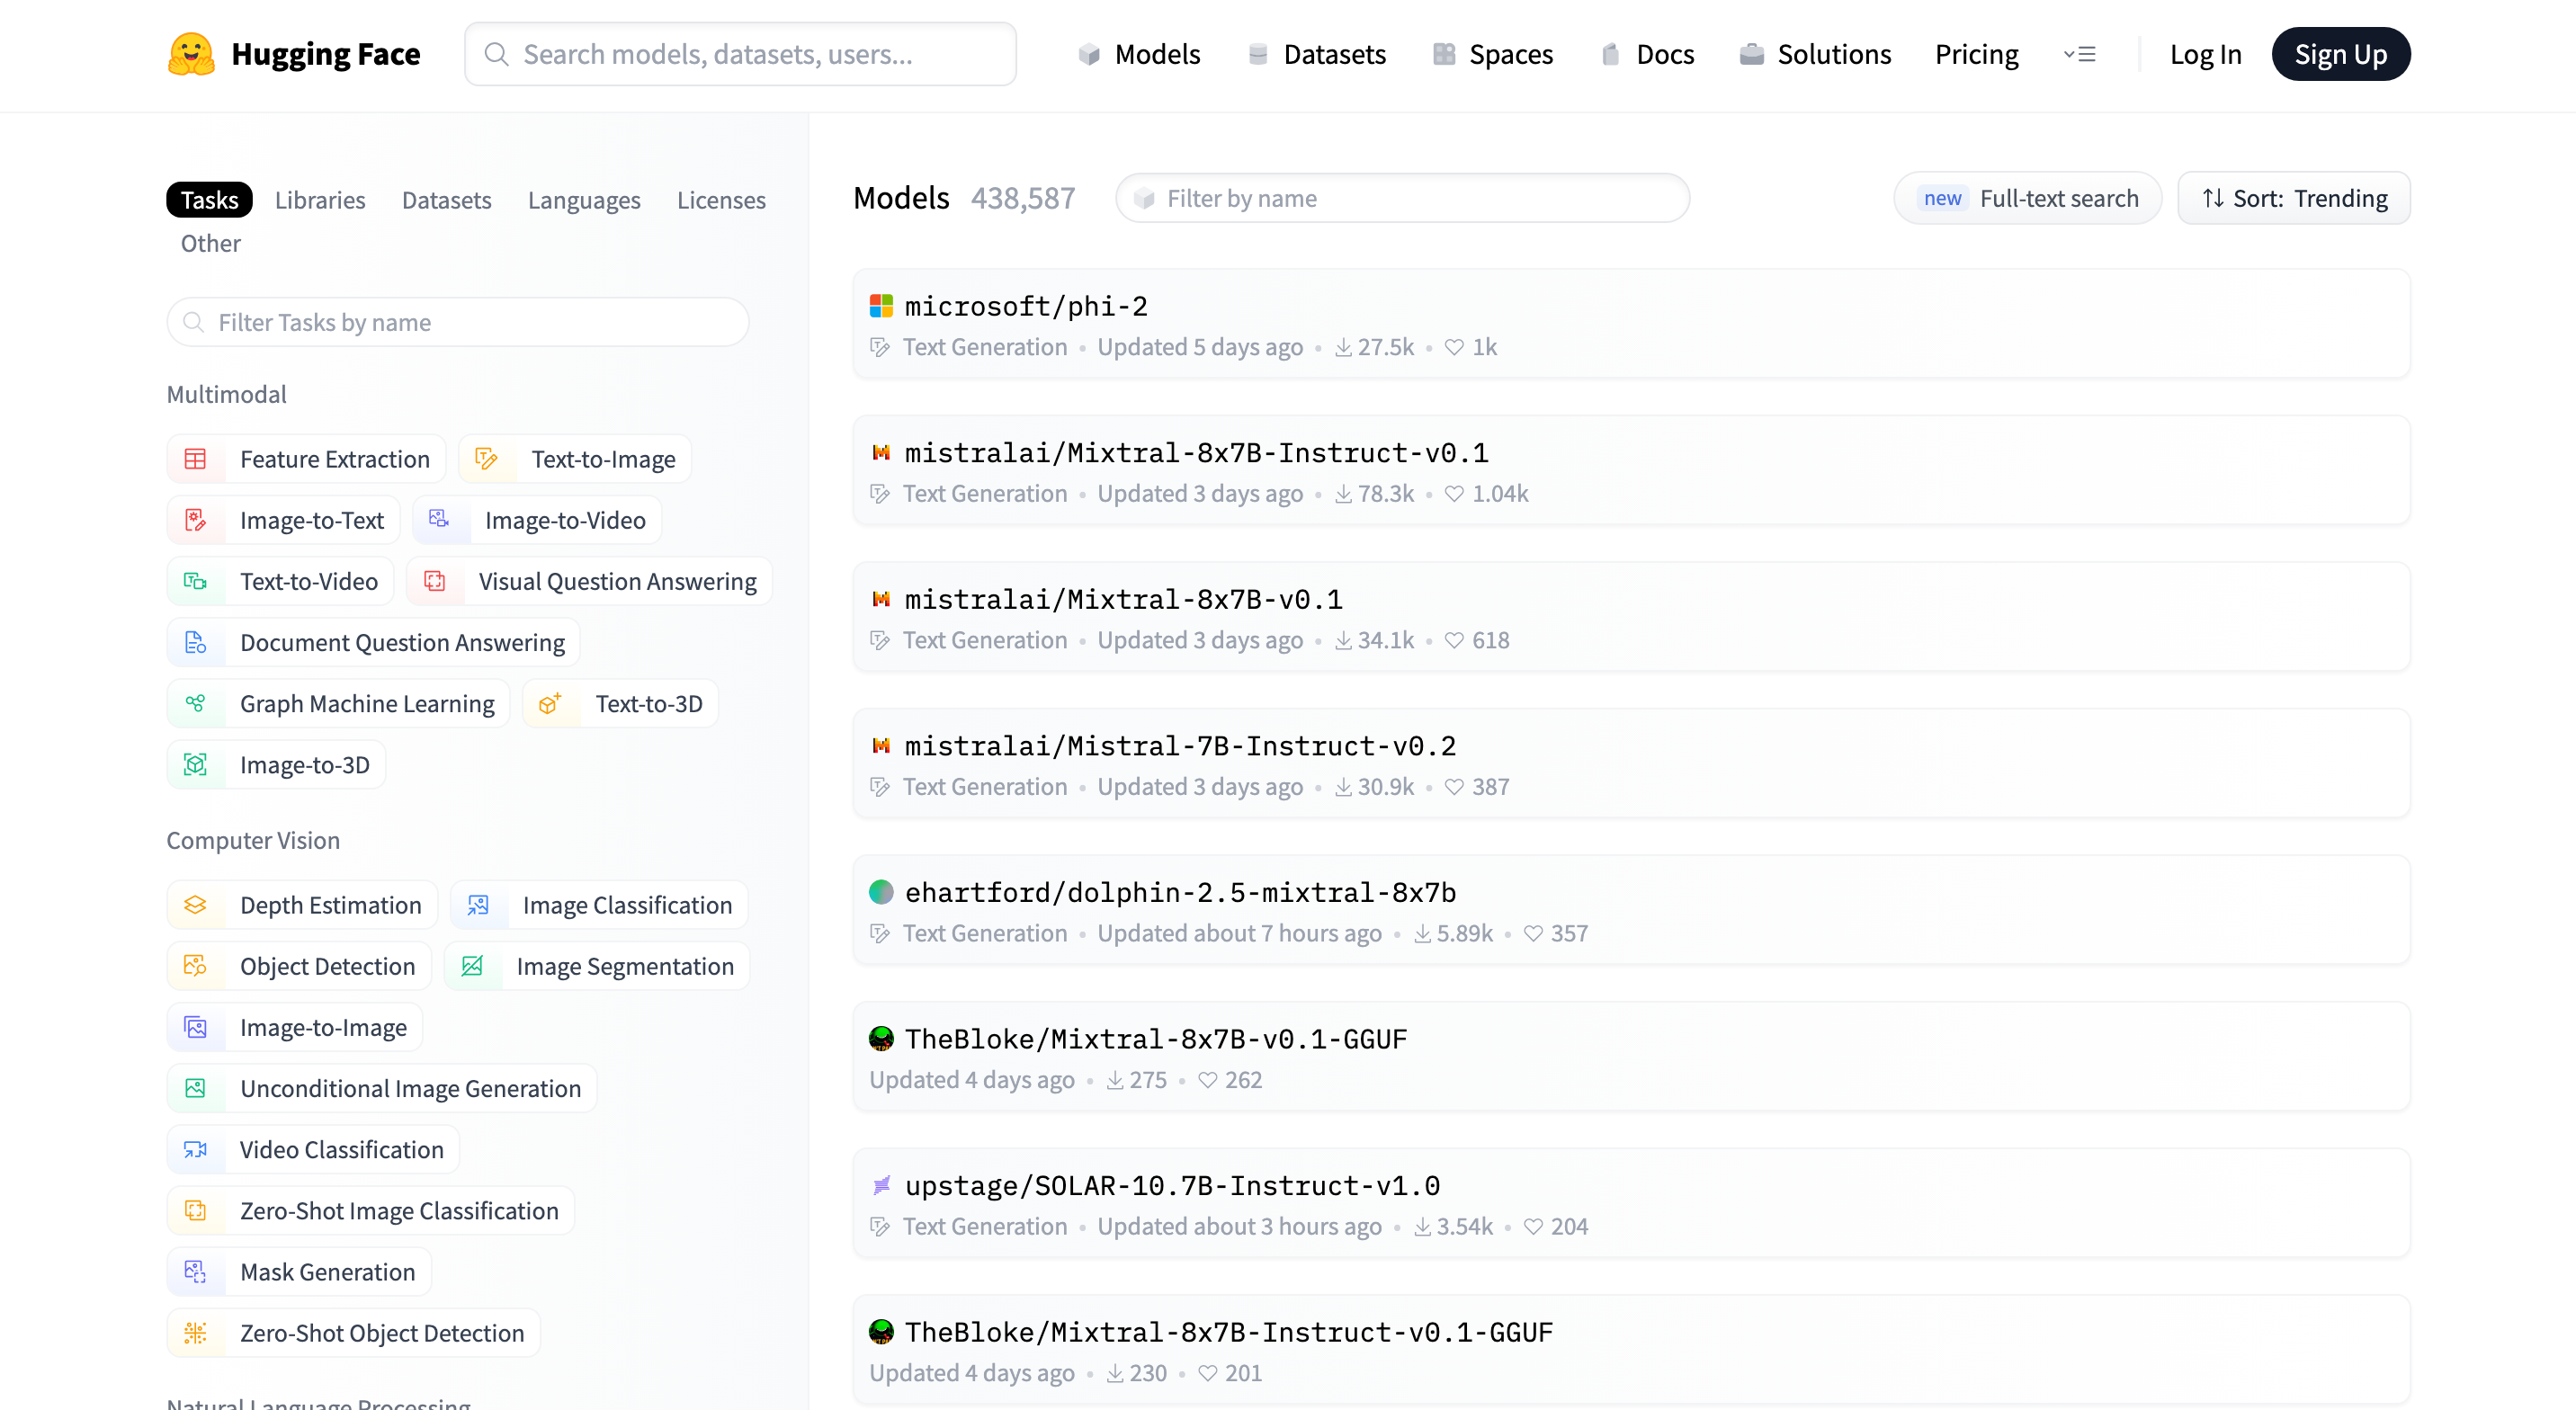


마스크 채우기를 수행할 수 있는 프랑스어 기반 모델을 찾아 사용해 보겠습니다. https://huggingface.co/models 에서는 제공되는 각종 모델, 데이터셋 등을 검색해 볼 수 있습니다. 이제 여기서 프랑스어 기반 보델인 camembert-base 를 검색하고 사용해 보겠습니다. 검색창에서 camembert-base를 검색하며 아래와 같이 모델에 대해 설명하는 Model card를 볼 수 있습니다.

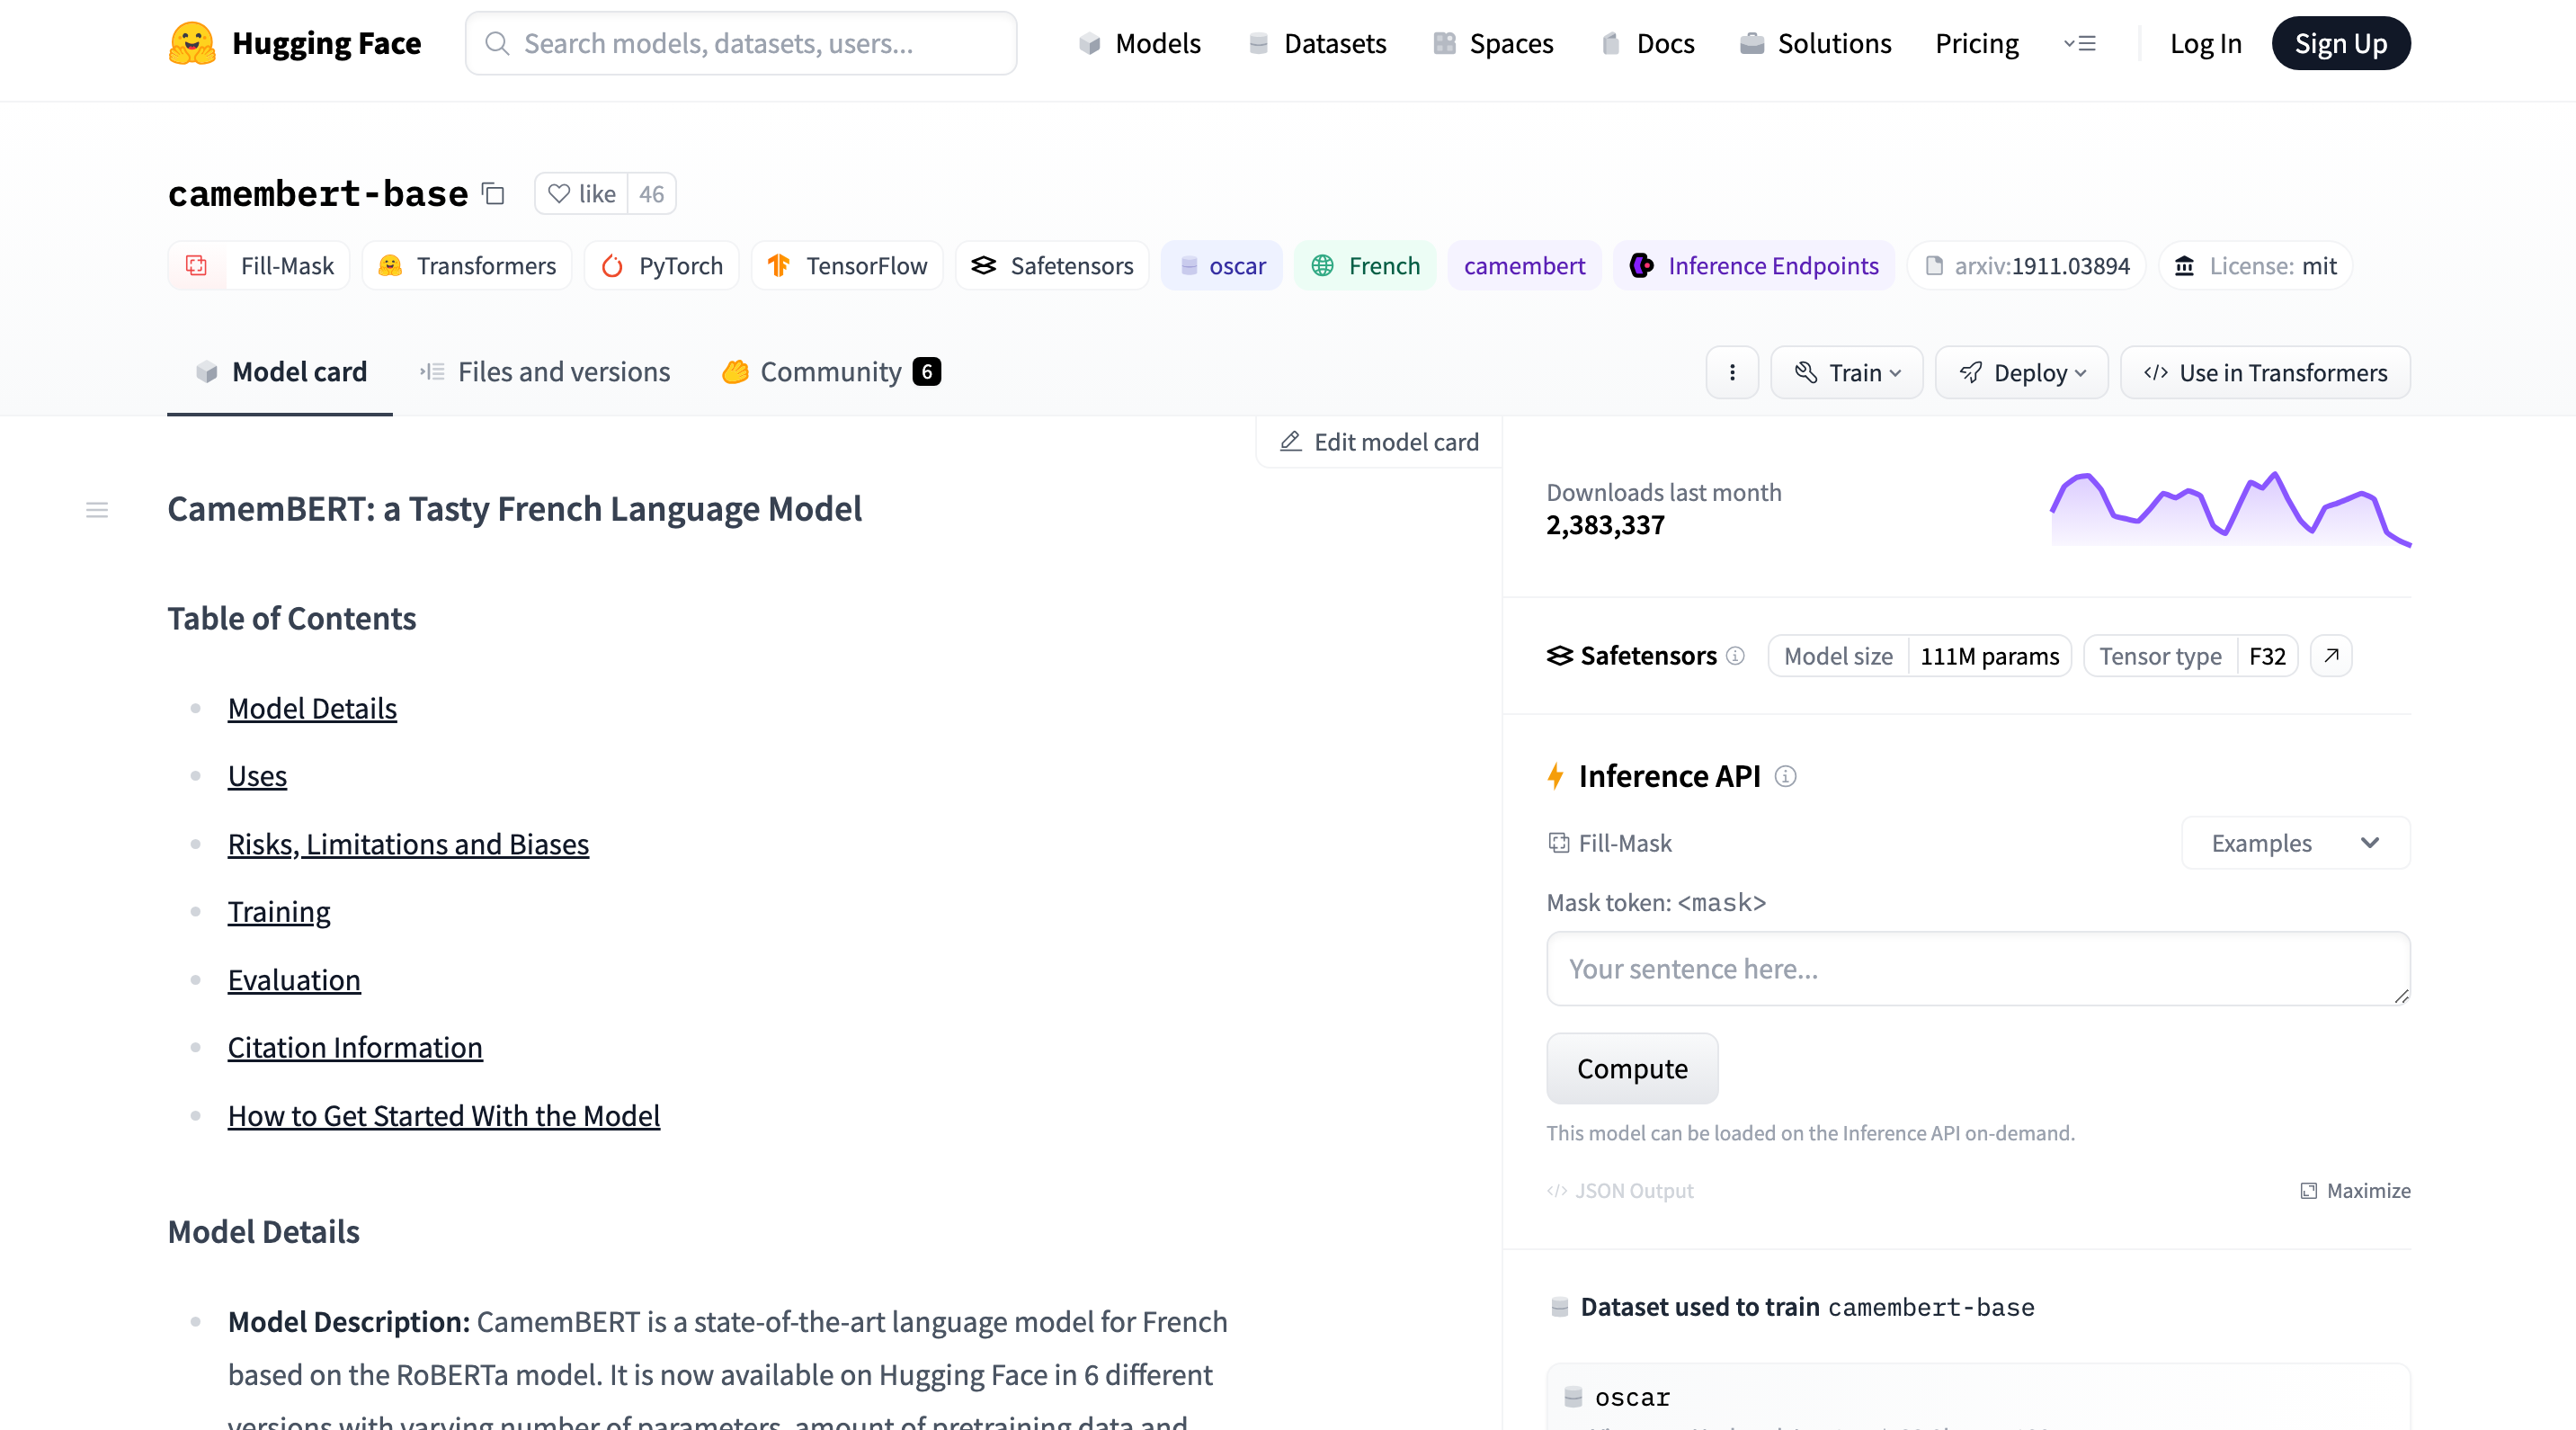

### pipeline에 pretrained checkpoint 사용하기
camembert-base라는 모델이 제공되고 있음을 확인 했으니 이제 camembert-base 체크포인트를 선택하여 사용해 보겠습니다. camembert-base라는 이름만 있으면 사용을 시작할 수 있습니다! 앞에서 실습했던 것처럼 pipeline() 함수를 이용해 모델을 가져올 수 있습니다



In [ ]:
from transformers import pipeline

camembert_fill_mask = pipeline("fill-mask", model="camembert-base")
results = camembert_fill_mask("Le camembert est <mask> :)")

Some weights of the model checkpoint at camembert-base were not used when initializing CamembertForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing CamembertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


``` bash
config.json: 100%
508/508 [00:00<00:00, 12.6kB/s]
model.safetensors: 100%
445M/445M [00:03<00:00, 141MB/s]
Some weights of the model checkpoint at camembert-base were not used when initializing CamembertForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing CamembertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
sentencepiece.bpe.model: 100%
811k/811k [00:00<00:00, 6.57MB/s]
tokenizer.json: 100%
1.40M/1.40M [00:00<00:00, 22.9MB/s]
```

In [ ]:
print(results)

[{'score': 0.4909118711948395, 'token': 7200, 'token_str': 'délicieux', 'sequence': 'Le camembert est délicieux :)'}, {'score': 0.10556942969560623, 'token': 2183, 'token_str': 'excellent', 'sequence': 'Le camembert est excellent :)'}, {'score': 0.034533195197582245, 'token': 26202, 'token_str': 'succulent', 'sequence': 'Le camembert est succulent :)'}, {'score': 0.033031314611434937, 'token': 528, 'token_str': 'meilleur', 'sequence': 'Le camembert est meilleur :)'}, {'score': 0.030076298862695694, 'token': 1654, 'token_str': 'parfait', 'sequence': 'Le camembert est parfait :)'}]


``` bash
[{'score': 0.4909118711948395, 'token': 7200, 'token_str': 'délicieux', 'sequence': 'Le camembert est délicieux :)'},
 {'score': 0.10556942969560623, 'token': 2183, 'token_str': 'excellent', 'sequence': 'Le camembert est excellent :)'},
 {'score': 0.034533195197582245, 'token': 26202, 'token_str': 'succulent', 'sequence': 'Le camembert est succulent :)'},
 {'score': 0.033031314611434937, 'token': 528, 'token_str': 'meilleur', 'sequence': 'Le camembert est meilleur :)'},
 {'score': 0.030076298862695694, 'token': 1654, 'token_str': 'parfait', 'sequence': 'Le camembert est parfait :)'}]

```

보시다시피 파이프라인 내에서 모델을 로드하는 것은 매우 간단합니다. 그저 사용하려는 작업에 적합해 보이는 체크포인트를 가져와 사용하면 됩니다. 예를 들어, 위 코드에서는 마스크 채우기를 위해 camembert-base 체크포인트를 로드하고 있는데, 목적에 부합하는 결과를 보여주고 있습니다. 반면 이 체크포인트를 텍스트 분류 를 위한 작업에 로드하면 camembert-base의 헤드가 이 작업에 적합하지 않기 때문에 의미없는결과를 반환하게 됩니다.

따라서 Hub에서는 목적에 맞게 체크포인트를 선택 할 수 있도록 아래와 같이 task selector를 제공합니다.

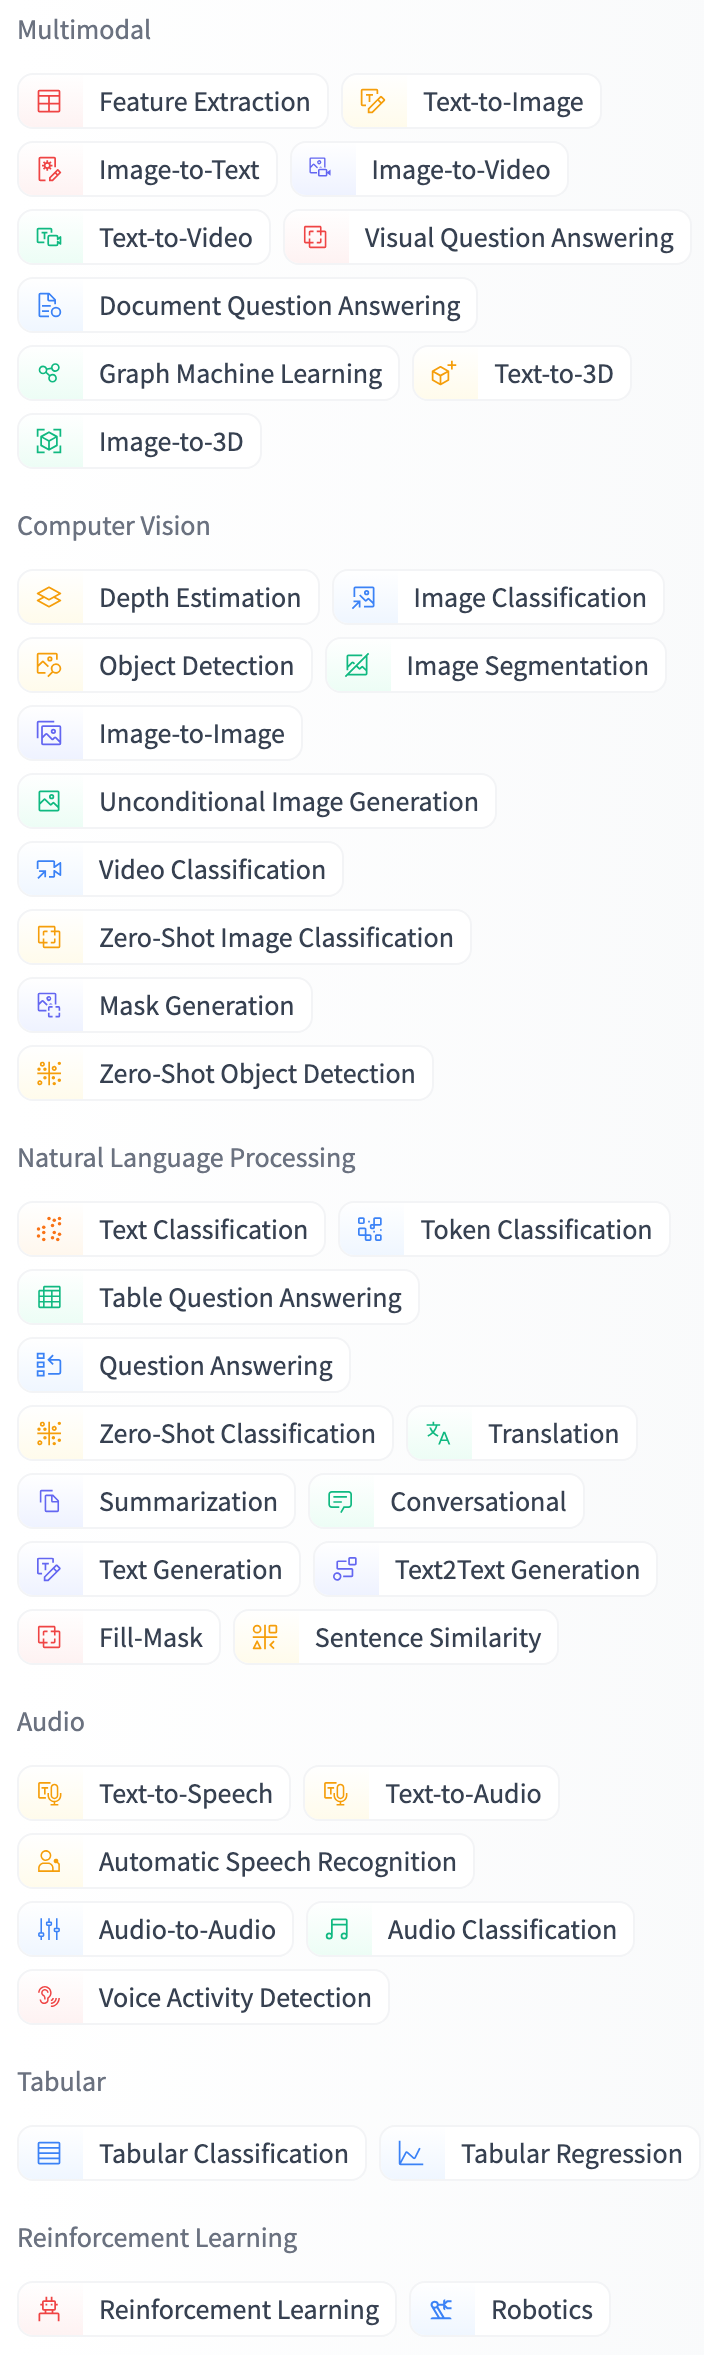

### Model에 pretrained checkpoint 불러오기

사용자는 Model 클래스를 통해 직접 모델을 구성하고 여기에 checkpoint를 불러올 수도 있습니다.

먼저 CamembertTokenizer 모델을 사용하기 위해 필요한 entencePiece 라이브러리를 설치합니다

In [ ]:
!pip install sentencepiece --quiet

In [ ]:
from transformers import CamembertTokenizer, CamembertForMaskedLM

tokenizer = CamembertTokenizer.from_pretrained("camembert-base")
model = CamembertForMaskedLM.from_pretrained("camembert-base")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of the model checkpoint at camembert-base were not used when initializing CamembertForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing CamembertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


그러나 Auto로 시작하는 이름의 클래스(AutoTokenizer, AutoModelFormaskedLM 등)는 설계상 아키텍처에 구애받지 않으므로 이걸 사용할 것을 권장합니다. 이전 코드 샘플은 CamemBERT 아키텍처에서 로드 가능한 체크포인트로 사용자를 제한했지만, Auto* 클래스를 사용하면 체크포인트 전환이 간단해집니다:

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("camembert-base")
model = AutoModelForMaskedLM.from_pretrained("camembert-base")

Some weights of the model checkpoint at camembert-base were not used when initializing CamembertForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing CamembertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Data set 사용하기

허브에는 모델만 있는 것이 아니라 다양한 언어로 된 여러 데이터 세트(Data set)도 있습니다. Hub가 제공하는 각종 데이터 세트는 https://huggingface.co/datasets 에서 볼 수 있습니다.먼저 MRPC (Microsoft Research Paraphrase Corpus) 데이터 세트를 Hub에서 받아 사용해 보겠습니다. 이 데이터 세트는 10가지 텍스트 분류 작업에서 ML 모델의 성능을 측정하는 데 사용되는 학술 벤치마크인 GLUE 벤치마크를 구성하는 10가지 데이터 세트 중 하나입니다.

 데이터셋 라이브러리는 허브에서 데이터셋을 다운로드하고 캐시하는 매우 간단한 명령을 제공합니다.다음과 같이 MRPC 데이터세트를 다운로드할 수 있습니다:

In [ ]:
!pip install datasets --quiet

In [ ]:
from datasets import load_dataset

raw_datasets = load_dataset("glue", "mrpc")
raw_datasets

Generating train split:   0%|          | 0/3668 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/408 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1725 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})

``` bash
DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})
```

보시다시피 train, validation, test 세트가 포함된 DatasetDict 객체를 얻습니다.각 객체에는 여러 개의 열(sentence1, sentence2, label, idx)과 각 집합의 요소 수인 가변적인 수의 행이 포함됩니다(예시된 데이터 세트는 train 세트에는 3,668쌍의 문장이, validation 세트에는 408개, test 세트에는 1,725개의 문장이 있습니다).

이 명령은 기본적으로 데이터셋을 다운로드하여 ~/.cache/huggingface/datasets에 캐시합니다. HF_HOME 환경 변수를 설정하여 캐시 폴더를 사용자 정의할 수도 있습니다.


dictionary 자료구조를 사용 할 때 처럼 인덱싱을 통해 raw_datasets 객체의 각 문장 쌍에 액세스할 수 있습니다.

In [ ]:
raw_train_dataset = raw_datasets["train"]
raw_train_dataset[0]

{'sentence1': 'Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .',
 'sentence2': 'Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .',
 'label': 1,
 'idx': 0}

``` bash
{'sentence1': 'Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .',
 'sentence2': 'Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .',
 'label': 1,
 'idx': 0}
```

하지만 이것은 Huggingface Data set이 제공하는 기능의 극히 일부에 불과합니다. Huggingface Data set이 제공하는 더 다양한 기능에 대해서 알아보도록 하겠습니다